## Importing libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import math
from mplsoccer import PyPizza, add_image, FontManager
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = "./EPL_20_21.csv"

premier = pd.read_csv(data)
premier.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [7]:
goals = px.bar(data_frame=premier.nlargest(15, 'Goals')[['Goals', 'Name']], 
              x='Name', y='Goals', color='Goals', text="Goals", color_continuous_scale='greens', 
              color_continuous_midpoint=10, opacity=0.8)
goals.update_layout(title_text="Top 15 Scores!", title_x=0.5, title_font=dict(size=25))
goals.update_traces(marker=dict(line=dict(color='#000000', width=2.5)), 
                    texttemplate='%{text:.2s}', textposition='outside')
goals.show()

In [8]:
premier['goals_min'] = premier['Mins'] / premier['Goals']
premier['goals_min'].replace(np.inf, np.nan, inplace=True)


goals_min = px.bar(data_frame=premier.nsmallest(15, 'goals_min')[['goals_min', 'Name']], 
                   x='Name', y='goals_min', color='goals_min', text='goals_min', color_continuous_scale='greens',
                  color_continuous_midpoint=10, opacity=0.8)
goals_min.update_layout(title_text='Top 15 Scores in minutes per play!', title_x=0.5, title_font=dict(size=25))
goals_min.update_traces(marker=dict(line=dict(color='#000000', width=2.5)),
                        texttemplate='%{text:.2f}',textposition='outside')
goals_min.show()

In [9]:
assists = px.bar(premier.nlargest(15, "Assists")[['Name','Assists']],
                x='Name', y='Assists', color='Assists', text='Assists', color_continuous_scale='darkmint',
                 color_continuous_midpoint=7, opacity=0.8)
assists.update_traces(marker=dict(line=dict(color='#000000', width=2)))
assists.update_layout(title_text='Top Assists of the Premier', title_x=0.5, title_font=dict(size=25))
assists.update_traces(texttemplate='%{text:.s}', textposition='outside')
assists.show()

In [ ]:
premier['assist_min'] = premier['Mins'] / premier['Assists']
premier['assist_min'].replace(np.inf, np.nan, inplace=True)

assist_min = px.bar(data_frame=premier.nsmallest(15, 'assist_min')[['assist_min', 'Name']], 
                    x='Name', y='assist_min', color='assist_min', text='assist_min', color_continuous_scale='darkmint', 
                    color_continuous_midpoint=130, opacity=0.8)
assist_min.update_layout(title_text='Top 15 assists in minutes per play!',title_x=0.5, title_font=dict(size=25))
assist_min.update_traces(marker=dict(line=dict(color='#000000', width=2.5)), texttemplate='%{text:.2f}',
                        textposition='outside')
assist_min.show()

### To be more accurate in % pass completion, i defined that's player must has played a minimum 30% of time expected for 38 games in Premier League, that's 1.026 minutes

In [10]:
premier_min = premier.loc[premier['Mins'] > 1026]
pass_acc = px.bar(data_frame=premier_min.nlargest(15, 'Perc_Passes_Completed')[['Perc_Passes_Completed', 'Name']],
                  x='Name', y='Perc_Passes_Completed', color='Perc_Passes_Completed', text='Perc_Passes_Completed',
                  color_continuous_scale='sunsetdark', opacity=0.8)
pass_acc.update_layout(title_text='Top 15 most accurates passers with minimun 1.026 minutes played!', 
                       title_x=0.5, title_font=dict(size=25))
pass_acc.update_traces(marker=dict(line=dict(color='#000000', width=2.5)), textposition='outside')
pass_acc.show()

In [11]:
goal_xG = px.bar(data_frame=premier.nlargest(15, 'xG')[['xG', 'Name']],
                x='Name', y='xG', color='xG', text='xG', color_continuous_scale='greens',
                 color_continuous_midpoint=0.5, opacity=0.8)
goal_xG.update_layout(title_text='Top 15 players with largest xG expected', title_x=0.5, title_font=dict(size=25))
goal_xG.update_traces(marker=dict(line=dict(color='#000000', width=2)), textposition='outside')

#### With the Xg (expected goals) data, we can calculate how many goals the player should have scored:
Projected goals = ((Mins / 90) * xG)
#### And then we can calculate what's tax of convertion the player had:
Convertion Rate: (Goals / Projected goals)

In [12]:
premier['conversion_rate'] = premier['Goals'] / ((premier['Mins'] / 90) * premier['xG'])
premier['conversion_rate'].replace([np.inf, -np.inf], 0, inplace=True)
#premier['conversion_rate'].fillna(0)

goals_rate = px.bar(data_frame=premier.nlargest(15, 'conversion_rate')[['conversion_rate', 'Name']],
                   x='Name', y='conversion_rate', color='conversion_rate', text='conversion_rate',
                   color_continuous_scale='greens', color_continuous_midpoint=3, opacity=0.8)
goals_rate.update_layout(title_text='Best 15 Players in convertion rates for xG (Expected goals)', title_x=0.5, 
                        title_font=dict(size=25))
goals_rate.update_traces(marker=dict(line=dict(color='#000000', width=2)), texttemplate='%{text:.2%}', textposition='outside')

### With the same metrics above, we can utilize it in xA (expected assists), first we look to the TOP 15 players in xA:

In [13]:
assist_xg = px.bar(data_frame=premier.nlargest(15,'xA')[['xA', 'Name']],
                  x='Name', y='xA', color='xA', text='xA', color_continuous_scale='darkmint',
                  color_continuous_midpoint=0.4, opacity=0.8)
assist_xg.update_layout(title_text='Best 15 Players in xA (Expected assists)', title_x=0.5, 
                        title_font=dict(size=25))
assist_xg.update_traces(marker=dict(line=dict(color='#000000', width=2)), textposition='outside')

#### Now, we will calculate the conversion rate for assistis
Projected assists = ((Mins / 90) * xA)

#### And then we can calculate what's tax of convertion the player had:
Convertion Rate: (Assists / Projected assists)

In [14]:
premier['Assist rate'] = premier['Assists'] / ((premier['Mins'] / 90) * premier['xA'])
premier['Assist rate'].replace([np.inf, -np.inf], 0, inplace=True)

assist_xa = px.bar(data_frame=premier.nlargest(15, 'Assist rate')[['Assist rate', 'Name']], 
                  x='Name', y='Assist rate', color='Assist rate', text='Assist rate', color_continuous_scale='darkmint', 
                  color_continuous_midpoint=4, opacity=0.8)
assist_xa.update_layout(title_text='Top 15 players with greatest assist rate', title_x=0.5, 
                        title_font=dict(size=25))
assist_xa.update_traces(marker=dict(line=dict(color='#000000')), texttemplate='%{text:.2%}', textposition='outside')
assist_xa.show()

### Participation in Goals (Goals + Assists)

In [15]:
premier['part_goals'] = premier['Goals'] + premier['Assists']
part = px.bar(data_frame=premier.nlargest(15, 'part_goals')[['part_goals', 'Name']], 
             x='Name', y='part_goals', color='part_goals', text='part_goals', color_continuous_scale='dense', 
             color_continuous_midpoint=25, opacity=0.8)
part.update_layout(title_text='Top 15 players with Goals + Assists', title_x=0.5, 
                        title_font=dict(size=25))
part.update_traces(marker=dict(line=dict(color='#000000')), textposition='outside')
part.show()

# Teams Analysis

In [16]:
clubs = premier.filter(['Club', 'Goals', 'Assists', 'Passes_Attempted', 
                        'Penalty_Goals', 'Penalty_Atempted', 'Yellow_Cards', 'Red_Cards']).groupby('Club').sum()
clubs2 = premier.filter(['Club', 'Age', 'Perc_Passes_Completed', 'xG', 'xA']).groupby('Club').mean()
df_clubs = pd.concat([clubs, clubs2], axis=1)
df_clubs['goals_min'] = 3420 / df_clubs['Goals']
df_clubs['assist_min'] = 3420 / df_clubs['Assists']
df_clubs['convertion_rate'] = (3420 * df_clubs['xG']) / df_clubs['Goals']
df_clubs['assists_rate'] = (3420 * df_clubs['xG']) / df_clubs['Assists']
df_clubs.head()

,Goals,Assists,Passes_Attempted,Penalty_Goals,Yellow_Cards,Red_Cards,Age,Perc_Passes_Completed,xG,xA,goals_min,assist_min,convertion_rate,assists_rate
Club,,,,,,,,,,,,,,
Arsenal,53,38,21291,6,49,5,24.965517,81.262069,0.126207,0.083448,64.528302,90.0,8.143917,11.358621
Aston Villa,52,38,16556,5,71,4,24.291667,76.795833,0.136667,0.085000,65.769231,90.0,8.988462,12.300000
Brighton,39,24,19456,6,49,6,24.555556,71.988889,0.125556,0.087407,87.692308,142.5,11.010256,17.891667
Burnley,32,20,15043,3,48,0,27.040000,67.456000,0.086800,0.045200,106.875000,171.0,9.276750,14.842800
Chelsea,56,38,25151,8,51,3,25.592593,84.033333,0.137037,0.085926,61.071429,90.0,8.369048,12.333333


## Total goals by team in the Premier League!

In [17]:
club_goals = px.bar(data_frame=df_clubs, x=df_clubs.index, y='Goals', color='Goals', text='Goals', 
                   color_continuous_scale='greens', color_continuous_midpoint=10, opacity=0.8)
club_goals.update_layout(title_text='Total goals by team!', title_x=0.5, title_font=dict(size=25))
club_goals.update_traces(marker=dict(line=dict(color='#000000', width=2.5)), textposition='outside')
club_goals.show()

### Total % Pass completed by every team:

In [18]:
pass_com = px.bar(data_frame=df_clubs, x=df_clubs.index, y='Perc_Passes_Completed', color='Perc_Passes_Completed', 
                 text='Perc_Passes_Completed', color_continuous_scale='darkmint', opacity=0.8)
pass_com.update_layout(title_text='Pass Completed Percentage by Team', title_x=0.5, title_font=dict(size=25))
pass_com.update_traces(marker=dict(line=dict(color="#000000", width=2.5)),
                       texttemplate='%{text:.2f}', textposition='outside')
pass_com.show()

### Identify the correlation in dataset:

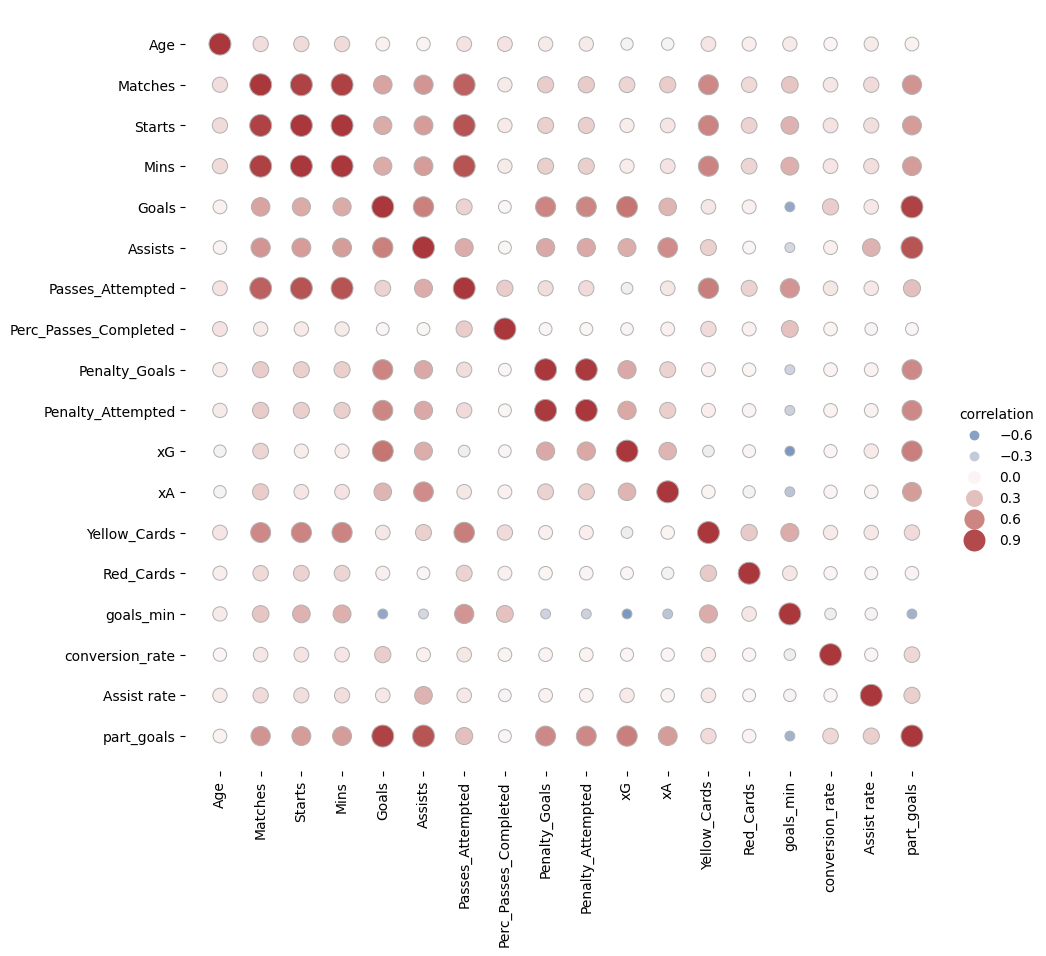

In [26]:
# Select only numeric columns
numeric_premier = premier.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation = numeric_premier.corr().stack().reset_index(name='correlation')

# Plot the correlation matrix
corr = sns.relplot(
    data=correlation,
    x='level_0',
    y='level_1',
    hue='correlation',
    size='correlation',
    palette="vlag",
    hue_norm=(-1, 1),
    edgecolor='.7',
    height=10,
    sizes=(50, 250),
    size_norm=(-.2, .8),

)
corr.set(xlabel="", ylabel="", aspect="equal")
corr.despine(left=True, bottom=True)
corr.ax.margins(.05)

# Rotate x-axis labels
for label in corr.ax.get_xticklabels():
    label.set_rotation(90)

### Now with this graphs we can determine some correlations between:
#### (Goals x Perc_Passes_Completed)
#### (Goals x (xA))
* Assists i didn't make correlation because no need, since an assist is just computed when a goal is scored.

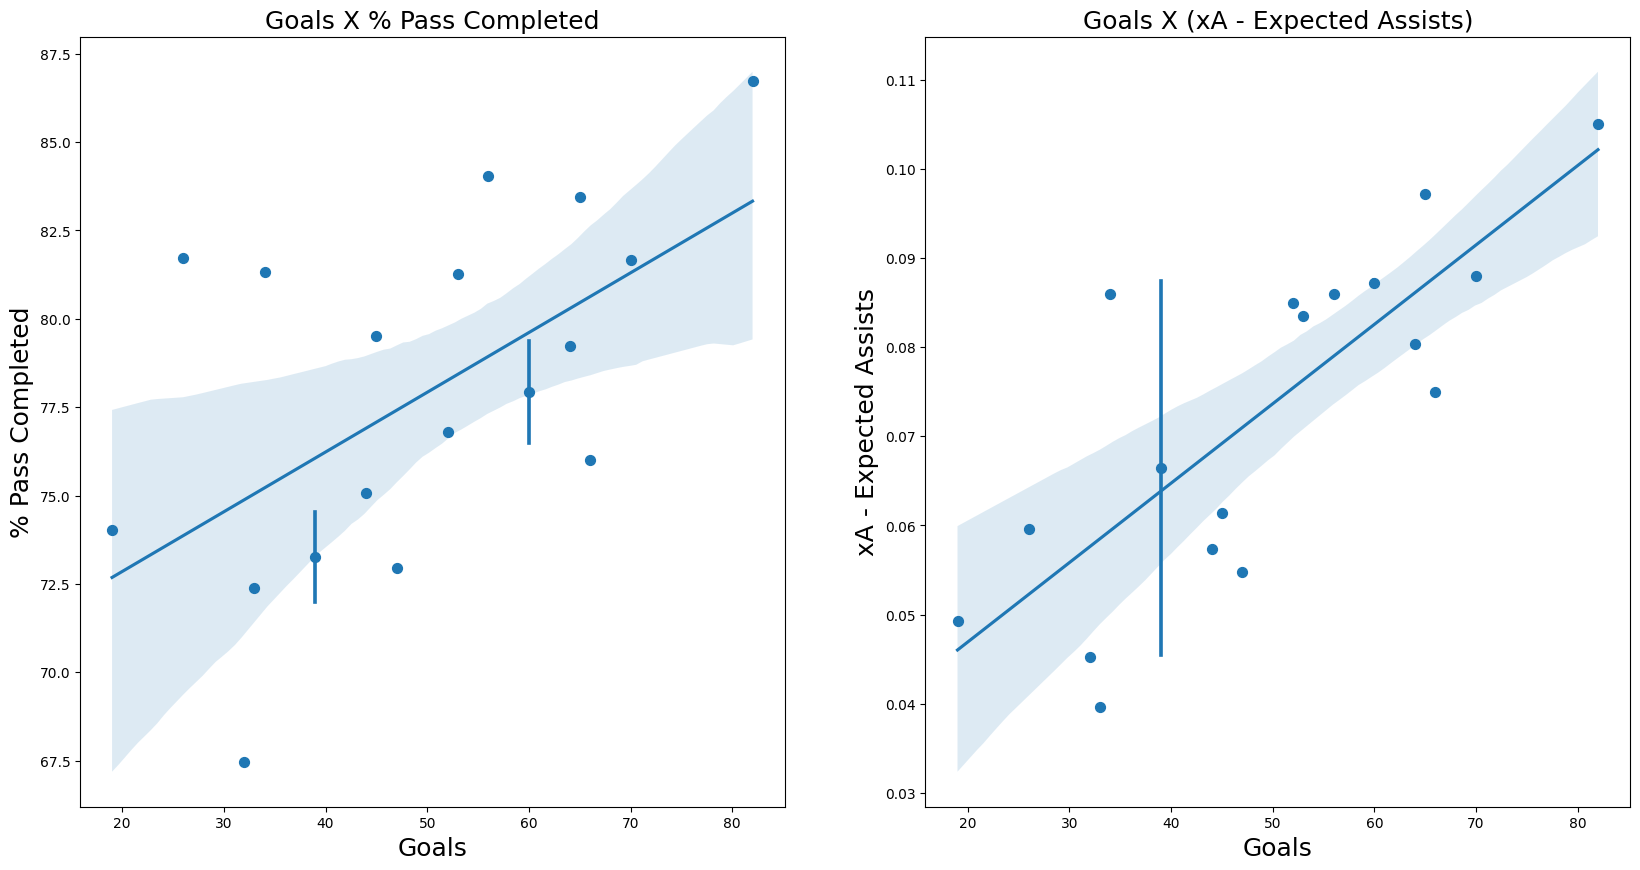

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
sns.regplot(x=df_clubs['Goals'], y=df_clubs['Perc_Passes_Completed'],
            x_estimator=np.mean, ax=ax1)
sns.regplot(x=df_clubs['Goals'], y=df_clubs['xA'],
            x_estimator=np.mean, ax=ax2)
ax1.set_xlabel('Goals', size=18)
ax2.set_xlabel('Goals', size=18)
ax1.set_ylabel('% Pass Completed', size=18)
ax2.set_ylabel('xA - Expected Assists', size=18)
ax1.set_title('Goals X % Pass Completed', size= 18 )
ax2.set_title('Goals X (xA - Expected Assists)', size= 18)
plt.show()

#### Results:
* Booth Graphs above show that's:
     
     * When a club had more % pass completion, they score more goals.
     * When a club had more xA (Expected Assists) they also score more goals.
   

### DREAM TEAM - MY METRICS

Well, since this dataset has some limited infos to determine the best players, i decided utilize some metrics to achieve what's the best team possible.

some considerations:
My team will created in formation 4-1-3-2

Players that's played in more than one position will be analysed in more than one position too, ex: a player with "DF" and "MF" ("DF,MF") will compete to enter the team in both positions.
   
### How i will create some metrics:

  * I will select only players with a minimum 1.026 minutes played in the Premier League season, it's 30% of the total games of each team (38 Games);
  
  * I will break apart the dataframe in 4(four) = Only Goalkeepers, Defenders, Midfielders and Forwards;
  
  * In each new dataframe, i will take 5(five) data (Goals, Assists, xA, xG and Perc_Passes_Completed) in each of this i will extract the maximum value and the minimum, the diference between they i will split in 10 equal parts, so the pontuaction will be, 1 for the minimum value, 2 for who has the minimum value + (1 part split), 3 for who has the minimum + (2 part split) --- Ex: in defenders the minimum value for goals are 0, and the maximum 8, so((8 - 0 = 8) / 10 = 0.8), a player thats score 3 goals will have the pontuaction of: <b><i>4 points</i></b>, because, 1 point >= 0 goals; 2 points >= 0,8 goals; 3 points >= 1,6 goals; 4 points >= 2,4 goals... 
 
 * the same method will be utilized to other positions and data...
       
       

In [28]:
premier = premier.loc[premier['Mins'] > 1026]
fields = [['Goals', 'goal_points'],['Assists', 'assist_point'], ['xA', 'xA_point'], ['xG', 'xG_point'] ,
          ['Perc_Passes_Completed','pass_perc_point']]

goalkeeper = premier.loc[premier['Position'] == 'GK']

defenders = premier.loc[(premier['Position'] == 'DF') | (premier['Position'] == 'FW,DF') | (premier['Position'] == 'DF,MF') |
(premier['Position'] == 'MF,DF') | (premier['Position'] == 'DF,FW')]

midfield = premier.loc[(premier['Position'] == 'MF,FW') | (premier['Position'] == 'MF') | (premier['Position'] == 'DF,MF') |
(premier['Position'] == 'MF,DF') | (premier['Position'] == 'FW,MF')]

forward = premier.loc[(premier['Position'] == 'MF,FW') | (premier['Position'] == 'FW') | (premier['Position'] == 'FW,DF') |
(premier['Position'] == 'DF,FW') | (premier['Position'] == 'FW,MF')]

list_position = [defenders, midfield, forward]

def points(i):
    if i >= y + (z * 9):
        point = 10
    elif i >= y + (z * 8):
        point = 9
    elif i >= y + (z * 7):
        point = 8
    elif i >= y + (z * 6):
        point = 7
    elif i >= y + (z * 5):
        point = 6
    elif i >= y + (z * 4):
        point = 5
    elif i >= y + (z * 3):
        point = 4
    elif i >= y + (z * 2):
        point = 3
    elif i >= y + z:
        point = 2
    else:
        point = 1
    return point

for var in list_position:
    position = var
    for var1, var2 in fields:
        x = var[var1].max()
        y = var[var1].min()
        z = (x - y) / 10
        var[var2] = var[var1].apply(points)

### The Goalkeeper of my Dream Team is:

   * GK - Goalkeeper dosen't have many informations to determine wich made most difficult stops, or make more cleansheets, i will utilize in my team the GK that had the better <b>'Perc_Passes_Completed'</b>, since my team whant's keep the ball.

In [29]:
goalkeeper.nlargest(1, 'Perc_Passes_Completed')[['Name','Club','Perc_Passes_Completed']]

,Name,Club,Perc_Passes_Completed
84,Alisson,Liverpool FC,85.2


### The Fullbacks are:
 * Where i will bring to the table, four(4) players for analysis, but only two(2) will make the team:
 
<i>Metrics are:</i>
 * Since we saw before, the importance of pass completion percentage, assists and xA to the team score more goals is very high, so, i want my team keep the ball the most of time, to delivery for my attackers great oportunities to score goals.
 * Then i define this proportions in points for this sector:
    
    <b>* pass_perc_point = 40%; </b>
    
    <b>* assist_point = 25%; </b>
    
    <b>* xA_point = 20%; </b>
    
    <b>* goal_points = 10%; </b>
    
    <b>* xG_point = 5% </b>

In [30]:
defenders['Fullback_%_point'] = ((defenders['pass_perc_point'] * 0.4) + (defenders['assist_point'] * 0.25) + 
                                (defenders['xA_point'] * 0.20) + (defenders['goal_points'] * 0.10) + 
                                (defenders['xG_point'] * 0.05))
defenders.nlargest(4,'Fullback_%_point')[['Name', 'Mins', 'Club', 'Fullback_%_point']]

,Name,Mins,Club,Fullback_%_point
401,Pascal Groß,2484,Brighton,6.95
82,Trent Alexander-Arnold,3031,Liverpool FC,6.75
18,Callum Hudson-Odoi,1059,Chelsea,6.40
80,Andrew Robertson,3383,Liverpool FC,6.35


In [31]:
# definition of paramters:

def player(value, player):
    for x in range(len(params)):
        value.append(math.floor(stats.percentileofscore(defenders[params[x]], player[x])))
    round(stats.percentileofscore(defenders[params[0]], player[0]))    
    for n, i in enumerate(value):
        if i == 100:
            value[n] = 99
# Graph
def graph(params, value, name, club):
    
    baker = PyPizza(
        params=params,                  # list of parameters
        straight_line_color="#000000",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_lw=1,               # linewidth of last circle
        other_circle_lw=1,              # linewidth for other circles
        other_circle_ls="-."            # linestyle for other circles
    )
    # plot pizza
    fig, ax = baker.make_pizza(
        value,              # list of values
        figsize=(8, 8),      # adjust figsize according to your need
        param_location=110,  # where the parameters will be added
        kwargs_slices=dict(
            facecolor="blue", edgecolor="#000000",
            zorder=2, linewidth=1,
        ),                   # values to be used when plotting slices
        kwargs_params=dict(
            color="black", fontsize=12,
            va="center", alpha=.8
        ),                   # values to be used when adding parameter
        kwargs_values=dict(
            color="black", fontsize=12,
            zorder=3,
            bbox=dict(
                edgecolor="black", facecolor="#6CABDD",
                boxstyle="round,pad=0.2", lw=1
            )
        )                    # values to be used when adding parameter-values
    )

    # add title
    fig.text(
        0.515, 0.97, str(name) + " | " + str(club), size=18,
        ha="center", color="#000000"
    )

    # add subtitle
    fig.text(
        0.515, 0.942,
        "Percentile Points in position - Premier League | 2020-21",
        size=15,
        ha="center", color="black"
    )

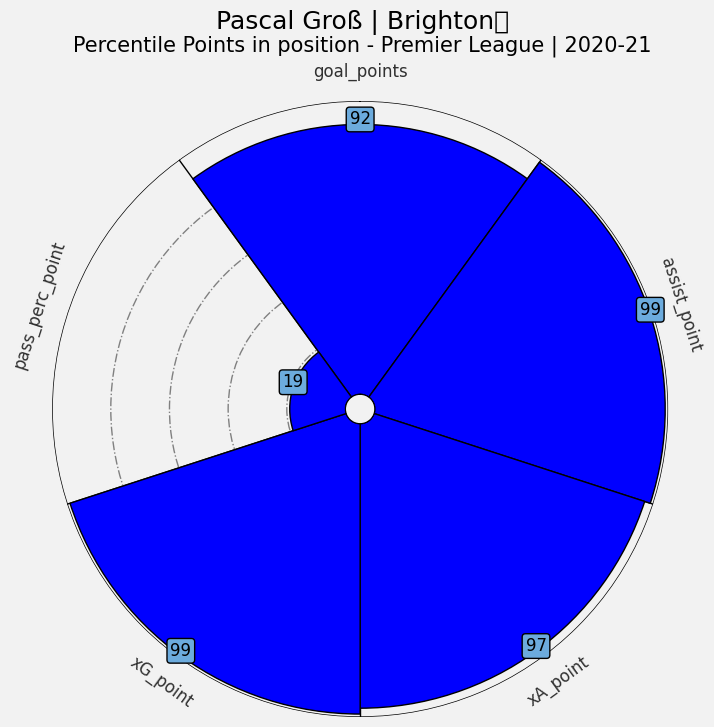

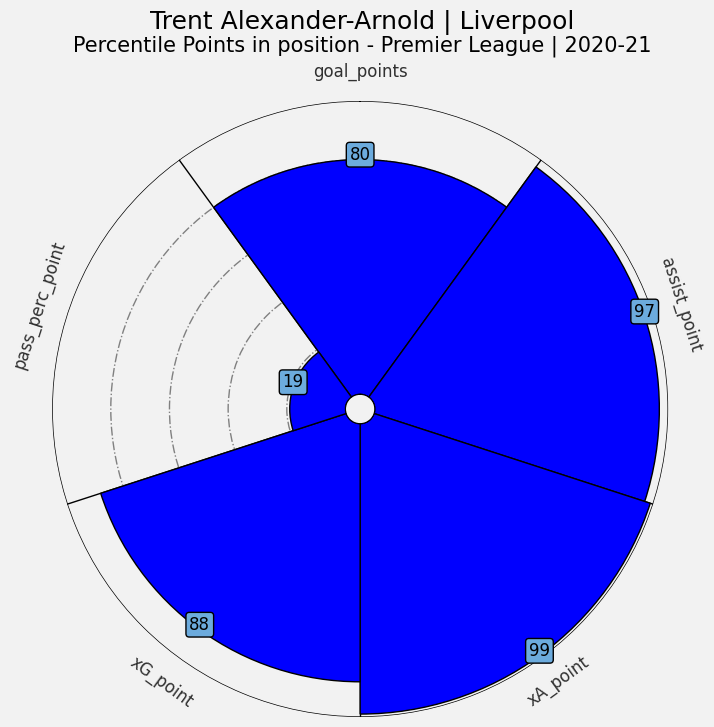

In [32]:
params = list(defenders.columns)
params = params[-6:-1]

#pascal is the player 1º place
Pascal = defenders.loc[defenders['Name'] == 'Pascal Groß'].reset_index()
Pascal = list(Pascal.loc[0])
Pascal = Pascal[-6:-1]
Pascalvalues = []
Pascal_name = 'Pascal Groß'
Pascal_club = 'Brighton	'

# Trent Alexander-Arnold is player in 2º place
trent = defenders.loc[defenders['Name'] == 'Trent Alexander-Arnold'].reset_index()
trent = list(trent.loc[0])
trent = trent[-6:-1]
trentvalues = []
trent_name = 'Trent Alexander-Arnold'
trent_club = 'Liverpool'


player(Pascalvalues, Pascal)
graph(params, Pascalvalues, Pascal_name, Pascal_club)
player(trentvalues, trent)
graph(params, trentvalues, trent_name, trent_club)

### The Centralbacks are:
 * Where i will bring to the table, four(4) players for analysis, but only two(2) will make the team:
 
<i>Metrics are:</i>
 * Since we saw before, the importance of pass completion percentage, assists and xA to the team score more goals is very high, so, i want my team keep the ball the most of time, to delivery for my attackers great oportunities to score goals.
 * Then i define this proportions in points for this sector:
    
    <b>* pass_perc_point = 65%; </b>
    
    <b>* assist_point = 15%; </b>
    
    <b>* xA_point = 10%; </b>
    
    <b>* goal_points = 5%; </b>
    
    <b>* xG_point = 5% </b>

In [33]:
defenders['Defense_%_point'] = ((defenders['pass_perc_point'] * 0.65) + (defenders['assist_point'] * 0.15) + 
                                (defenders['xA_point'] * 0.10) + (defenders['goal_points'] * 0.05) + 
                                (defenders['xG_point'] * 0.05))

defenders.nlargest(4, 'Defense_%_point')[['Name', 'Mins', 'Club', 'Defense_%_point']]

,Name,Mins,Club,Defense_%_point
9,Kurt Zouma,2029,Chelsea,7.30
38,John Stones,1933,Manchester City,7.30
114,Wilfred Ndidi,2176,Leicester City,7.25
8,Thiago Silva,1935,Chelsea,7.05


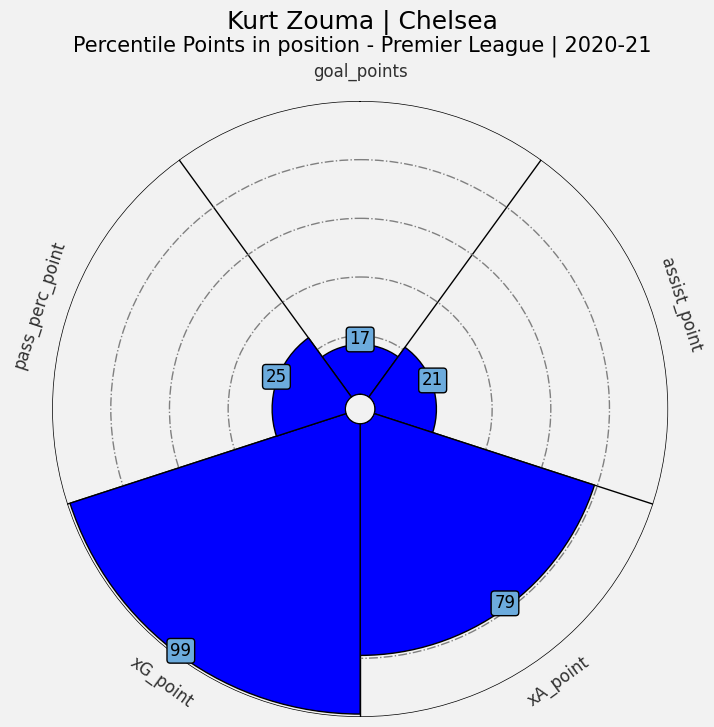

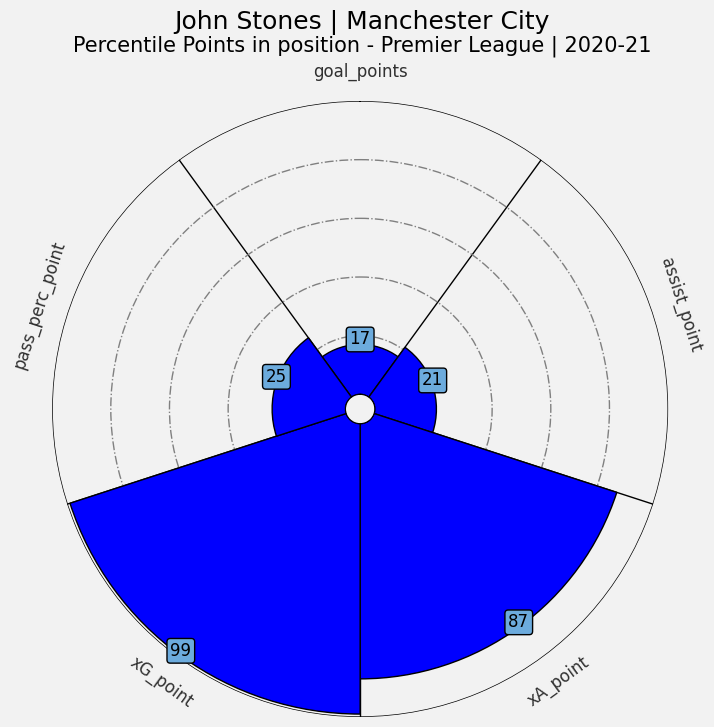

In [34]:
# Zouma is the player 1º place
zouma = defenders.loc[defenders['Name'] == 'Kurt Zouma'].reset_index()
zouma = list(zouma.loc[0])
zouma = zouma[-6:-1]
zoumavalues = []
zouma_name = 'Kurt Zouma'
zouma_club = 'Chelsea'

# Stones is player in 2º place
stones = defenders.loc[defenders['Name'] == 'John Stones'].reset_index()
stones = list(stones.loc[0])
stones = stones[-6:-1]
stonesvalues = []
stones_name = 'John Stones'
stones_club = 'Manchester City'


player(zoumavalues, zouma)
graph(params, zoumavalues, zouma_name, zouma_club)
player(stonesvalues, stones)
graph(params, stonesvalues, stones_name, stones_club)

### The Midfielders are:
 * Where i will bring to the table, six(6) players for analysis, but only four(4) will make the team:
 
<i>Metrics are:</i>
 * Since we saw before, the importance of pass completion percentage, assists and xA to the team score more goals is very high, but now, i want more for my players, i want more decision, more assists, more chances in xA, it's helps delivery for my attackers great oportunities to score, but also expected to my midfielders they score goals too..
 * Then i define this proportions in points for this sector:
    
    <b>* pass_perc_point = 30%; </b>
    
    <b>* assist_point = 25%; </b>
    
    <b>* xA_point = 20%; </b>
    
    <b>* goal_points = 20%; </b>
    
    <b>* xG_point = 5% </b>

In [35]:
midfield['Midfield_%_point'] = ((midfield['pass_perc_point'] * 0.30) + (midfield['assist_point'] * 0.25) + 
                                (midfield['xA_point'] * 0.20) + (midfield['goal_points'] * 0.20) + 
                                (midfield['xG_point'] * 0.05))

midfield.nlargest(6, 'Midfield_%_point')[['Name', 'Mins', 'Club', 'Midfield_%_point', 'pass_perc_point', 'Perc_Passes_Completed']]

,Name,Mins,Club,Midfield_%_point,pass_perc_point,Perc_Passes_Completed
51,Bruno Fernandes,3099,Manchester United,7.30,3,74.6
34,Kevin De Bruyne,1997,Manchester City,7.00,4,76.0
33,İlkay Gündoğan,2029,Manchester City,6.55,10,91.0
273,Jack Grealish,2185,Aston Villa,6.35,5,78.5
39,Phil Foden,1616,Manchester City,5.80,6,82.0
32,Bernardo Silva,2065,Manchester City,5.55,9,89.7


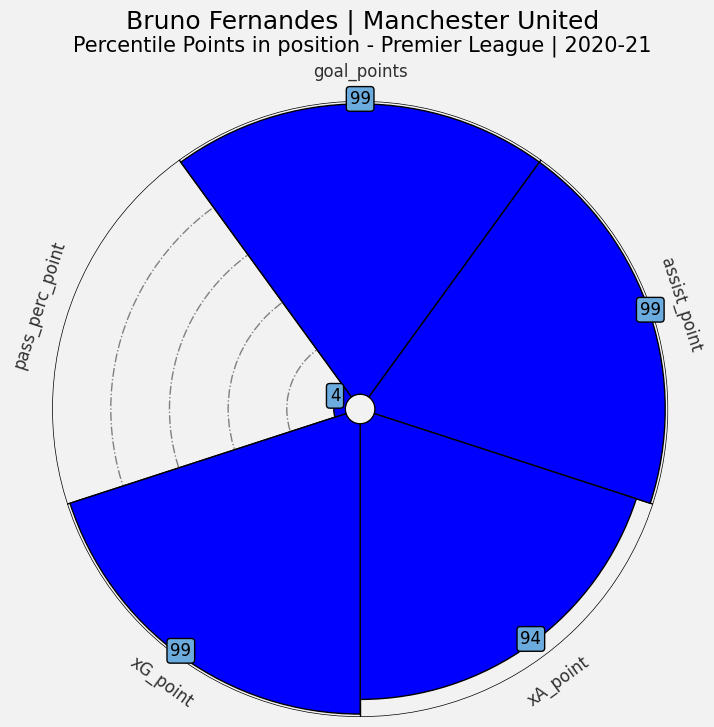

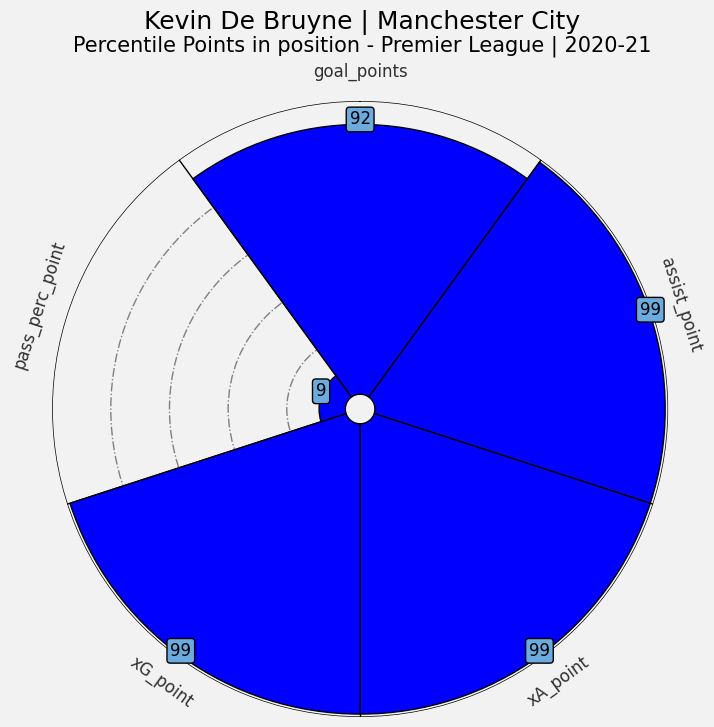

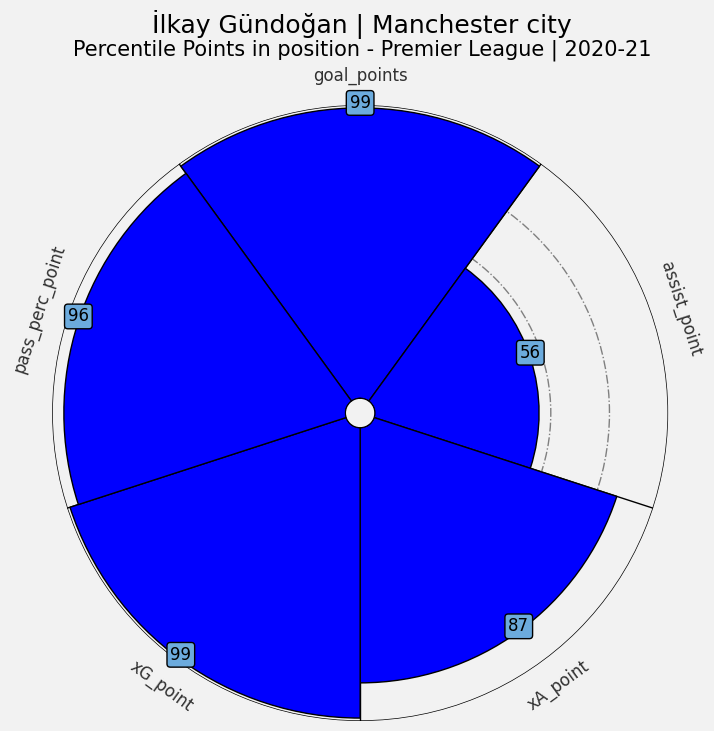

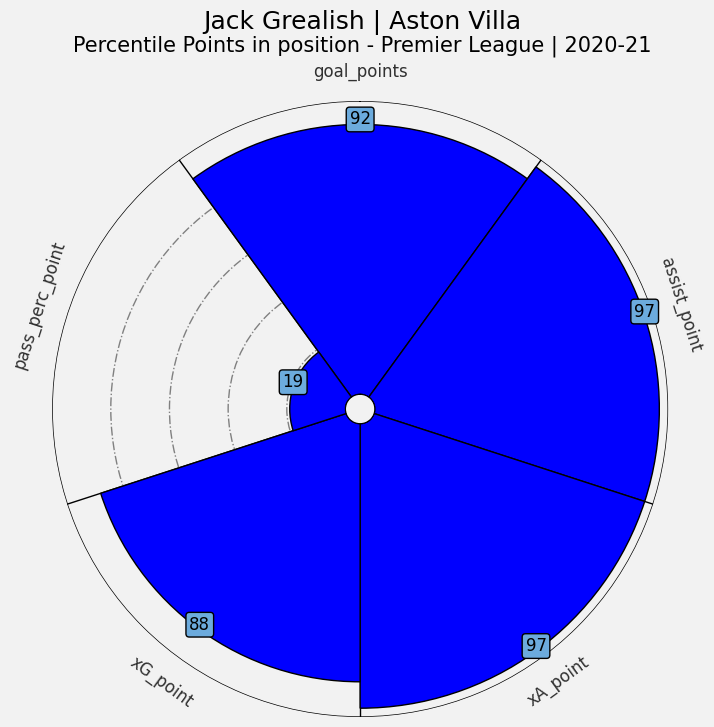

In [36]:
# Bruno Fernandes is the player 1º place
bruno = midfield.loc[midfield['Name'] == 'Bruno Fernandes'].reset_index()
bruno = list(bruno.loc[0])
bruno = bruno[-6:-1]
brunovalues = []
bruno_name = 'Bruno Fernandes'
bruno_club = 'Manchester United'

# Kevin De Bruyne is player in 2º place
kevin = midfield.loc[midfield['Name'] == 'Kevin De Bruyne'].reset_index()
kevin = list(kevin.loc[0])
kevin = kevin[-6:-1]
kevinvalues = []
kevin_name = 'Kevin De Bruyne'
kevin_club = 'Manchester City'

# İlkay Gündoğan is the player 3º place
ilkai = midfield.loc[midfield['Name'] == 'İlkay Gündoğan'].reset_index()
ilkai = list(ilkai.loc[0])
ilkai = ilkai[-6:-1]
ilkaivalues = []
ilkai_name = 'İlkay Gündoğan'
ilkai_club = 'Manchester city'

# Jack Grealish is player in 4º place
jack = midfield.loc[midfield['Name'] == 'Jack Grealish'].reset_index()
jack = list(jack.loc[0])
jack = jack[-6:-1]
jackvalues = []
jack_name = 'Jack Grealish'
jack_club = 'Aston Villa'


player(brunovalues, bruno)
graph(params, brunovalues, bruno_name, bruno_club)
player(kevinvalues, kevin)
graph(params, kevinvalues, kevin_name, kevin_club)
player(ilkaivalues, ilkai)
graph(params, ilkaivalues, ilkai_name, ilkai_club)
player(jackvalues, jack)
graph(params, jackvalues, jack_name, jack_club)

### The Attackers are:
 * Where i will bring to the table, four(4) players for analysis, but only two(2) will make the team:
 
<i>Metrics are:</i>
 * Since we saw before, the importance of pass completion percentage, assists and xA to the team score more goals is very high, but now, i don't expected my forwards passing the ball all the time, my team already create great oportunities to they score...
 * Then i define this proportions in points for this sector:
    
    <b>* pass_perc_point = 10%; </b>
    
    <b>* assist_point = 15%; </b>
    
    <b>* xA_point = 10%; </b>
    
    <b>* goal_points = 50%; </b>
    
    <b>* xG_point = 15% </b>

In [37]:
forward['Forward_%_point'] = ((forward['pass_perc_point'] * 0.10) + (forward['assist_point'] * 0.15) + 
                                (forward['xA_point'] * 0.10) + (forward['goal_points'] * 0.50) + 
                                (forward['xG_point'] * 0.15))

forward.nlargest(4, 'Forward_%_point')[['Name', 'Mins', 'Club', 'Forward_%_point']]

,Name,Mins,Club,Forward_%_point
162,Harry Kane,3082,Tottenham Hotspur,9.00
81,Mohamed Salah,3078,Liverpool FC,8.50
161,Son Heung-min,3114,Tottenham Hotspur,7.35
214,Patrick Bamford,3050,Leeds United,7.25


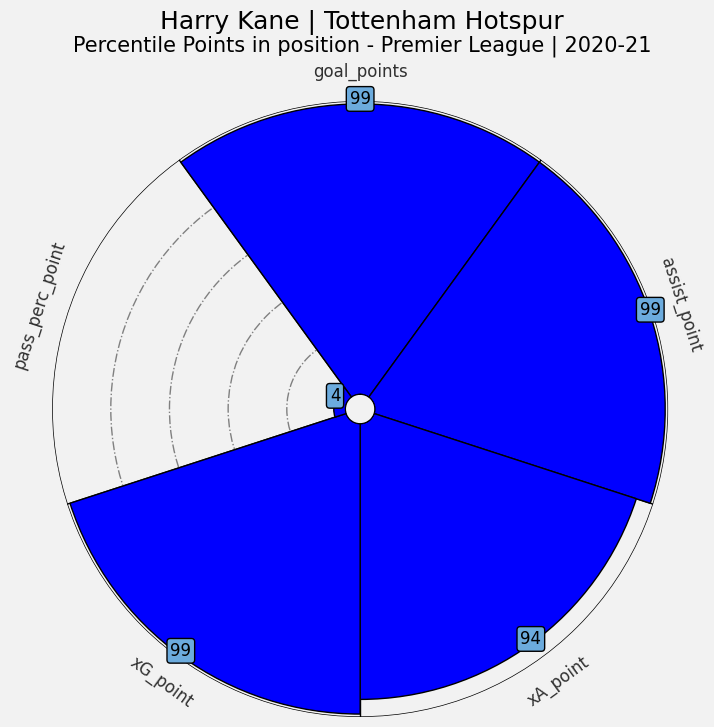

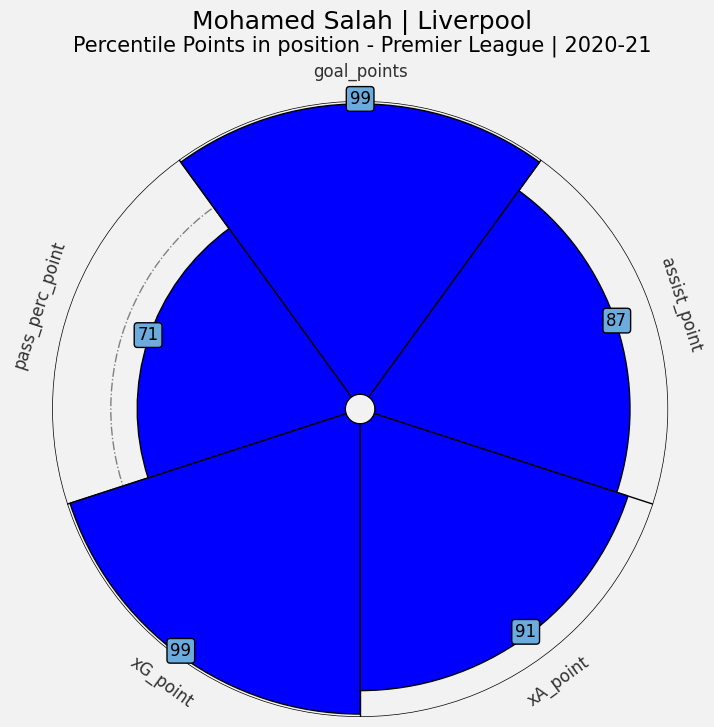

In [38]:
# Harry Kane is the player 1º place
kane = forward.loc[forward['Name'] == 'Harry Kane'].reset_index()
kane = list(kane.loc[0])
kane = kane[-6:-1]
kanevalues = []
kane_name = 'Harry Kane'
kane_club = 'Tottenham Hotspur'

# Mohamed Salah is player in 2º place
salah = forward.loc[forward['Name'] == 'Mohamed Salah'].reset_index()
salah = list(salah.loc[0])
salah = salah[-6:-1]
salahvalues = []
salah_name = 'Mohamed Salah'
salah_club = 'Liverpool'


player(kanevalues, kane)
graph(params, kanevalues, kane_name, kane_club)
player(salahvalues, salah)
graph(params, salahvalues, salah_name, salah_club)

# So the Dream Team is ready to play:

Gk - 1 - Alisson Becker  

Fb - 2 - Pascal Groß

Fb - 6 - Trent Alexander-Arnold

Cb - 3 - Kurt Zouma

Cb - 4 - John Stones

Mdc- 5 - İlkay Gündoğan

MAr- 8 - Bruno Fernandes

MAl- 7 - Jack Grealish

MAc- 10 - Kevin De Bruyne

At - 9 - Harry Kane

At - 11 - Mohamed Salah

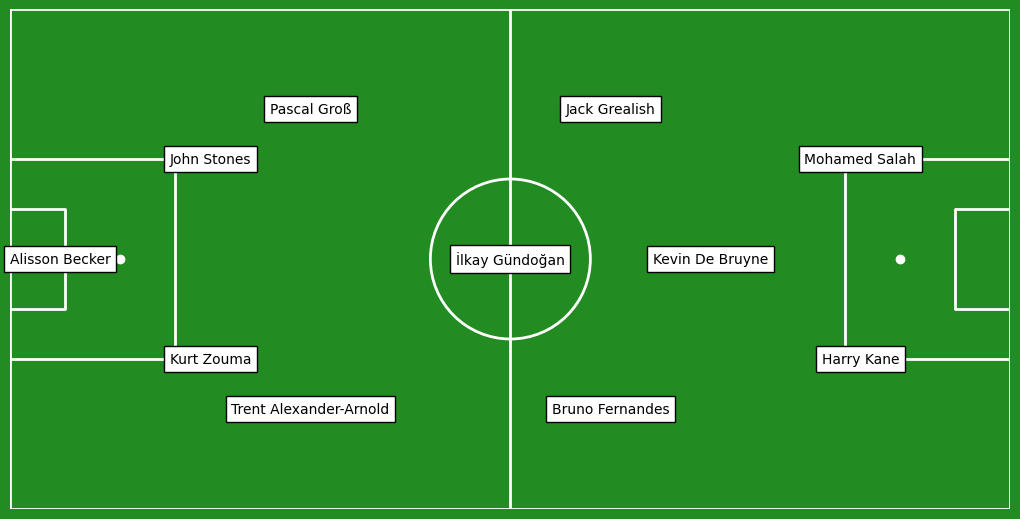

In [51]:
import matplotlib.pyplot as plt

# Create a soccer pitch
def draw_pitch():
    # Create figure and axes with green background
    fig = plt.figure(figsize=(10, 7), facecolor='forestgreen')
    ax = fig.add_subplot(111, facecolor='forestgreen')
    
    # Pitch Outline and all other lines in white
    ax.plot([0, 0, 100, 100, 0], [0, 50, 50, 0, 0], color="white", linewidth=2)
    # Center Line
    ax.plot([50, 50], [0, 50], color="white", linewidth=2)
    # Left Penalty Area
    ax.plot([0, 16.5, 16.5, 0], [15, 15, 35, 35], color="white", linewidth=2)
    # Right Penalty Area
    ax.plot([100, 83.5, 83.5, 100], [15, 15, 35, 35], color="white", linewidth=2)
    # Left Goal Area
    ax.plot([0, 5.5, 5.5, 0], [20, 20, 30, 30], color="white", linewidth=2)
    # Right Goal Area
    ax.plot([100, 94.5, 94.5, 100], [20, 20, 30, 30], color="white", linewidth=2)
    # Center Circle
    center_circle = plt.Circle((50, 25), 8, color="white", fill=False, linewidth=2)
    ax.add_patch(center_circle)
    # Center Spot
    ax.plot(50, 25, "o", color="white")
    # Left Penalty Spot
    ax.plot(11, 25, "o", color="white")
    # Right Penalty Spot
    ax.plot(89, 25, "o", color="white")
    
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 50)
    ax.set_aspect("equal")
    plt.axis("off")
    
    # Remove margins to ensure the green background fills the entire plot
    plt.margins(0,0)
    fig.tight_layout(pad=0)
    
    return fig, ax

# Player positions for 4-4-2 formation
positions = {
    "Gk": (5, 25),  # Goalkeeper
    "Fb1": (30, 10),  # Left Fullback
    "Cb1": (20, 15),  # Left Center Back
    "Cb2": (20, 35),  # Right Center Back
    "Fb2": (30, 40),  # Right Fullback
    "Mdc": (50, 25),  # Defensive Midfielder
    "MAl": (60, 10),  # Left Midfielder
    "MAr": (60, 40),  # Right Midfielder
    "MAc": (70, 25),  # Central Midfielder
    "At1": (85, 15),  # Left Striker
    "At2": (85, 35),  # Right Striker
}

# Player names
players = {
    "Gk": "Alisson Becker",
    "Fb1": "Trent Alexander-Arnold",
    "Cb1": "Kurt Zouma",
    "Cb2": "John Stones",
    "Fb2": "Pascal Groß",
    "Mdc": "İlkay Gündoğan",
    "MAl": "Bruno Fernandes",
    "MAr": "Jack Grealish",
    "MAc": "Kevin De Bruyne",
    "At1": "Harry Kane",
    "At2": "Mohamed Salah",
}

# Draw the pitch
fig, ax = draw_pitch()

# Plot players on the pitch
for position, (x, y) in positions.items():
    ax.text(x, y, players[position], ha="center", va="center", fontsize=10, bbox=dict(facecolor="white", edgecolor="black"))

plt.show()

## Thanks! I hope you enjoy!